In [37]:
import pandas as pd
X_train=pd.read_csv("PS3-2/PS3_2_X_Train.csv")

y_train=pd.read_csv("PS3-2/PS3_2_Y_Train.csv")
y_train=y_train.values.reshape(y_train.shape[0],)
X_train

,-0.21961,2.0415
0,-0.45610,2.19650
1,-0.13035,2.31260
2,-0.69960,1.77870
3,-1.18060,1.84660
4,-0.78022,2.32240
...,...,...
130,1.79620,0.24665
131,2.19270,-0.34939
132,1.27980,-0.73467
133,2.14100,-0.14802


In [61]:
import numpy as np
import matplotlib.pyplot as plt
# A convenience function to plot the decision region
# This replaces the plotting method that's part of sklearn version 1.1.1
def plotit(X, Y, model):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[X.columns[0]].min() - .5, X[X.columns[0]].max() + .5
    y_min, y_max = X[X.columns[1]].min() - .5, X[X.columns[1]].max() + .5
    h = .02  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Plotting below requires integer target variables (for colors)
    # However, sklearn algorithm handles categorical variables automagically
    if isinstance(Y[0], str):
        print("Converting strings to integers for plotting")
        Z = pd.factorize(Z)[0]
        Y = pd.factorize(Y)[0]

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(4, 3))
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

    # Plot also the training points
    plt.scatter(X[[X.columns[0]]], X[X.columns[1]], c=Y, edgecolors='k', cmap=plt.cm.Paired)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(());

In [62]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e5)
logreg.fit(X_train, y_train)

LogisticRegression(C=100000.0)

In [24]:
logreg.coef_

array([[ 21.43440186, -20.14933678]])

In [39]:
X_train['-0.21961']

0     -0.45610
1     -0.13035
2     -0.69960
3     -1.18060
4     -0.78022
        ...   
130    1.79620
131    2.19270
132    1.27980
133    2.14100
134    0.87555
Name: -0.21961, Length: 135, dtype: float64

/Users/yune/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


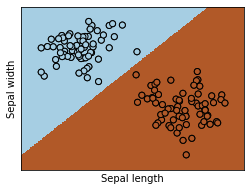

In [63]:
plotit(X_train,y_train,logreg)
plt.scatter(X_train[X_train.columns[0]],X_train[X_train.columns[1]], c=y_train, edgecolors="k", cmap=plt.cm.Paired)

In [55]:
X_test=pd.read_csv("PS3-2/PS3_2_X_Test.csv")
y_test=pd.read_csv("PS3-2/PS3_2_Y_Test.csv")
y_test

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,1
7,1
8,1
9,1


In [56]:
logreg.predict(X_test.values)

/Users/yune/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1])